# Diabetes Prediction

What is Diabetes? Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. 
* let see how to use Machine Learning can help us predict Diabetes. Let’s get started!

# Import libararies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt

# PIMA data Set

The Pima Indians Diabetes Dataset is a well-known dataset that is often used to evaluate machine learning models for diabetes prediction. It consists of medical records for patients of the Pima Indian tribe in Arizona, and includes a number of features that are thought to be related to the development of diabetes. The goal of the analysis is to use the training data to build a model that can predict whether or not a patient has diabetes based on the available features.

The Pima dataset includes the following features:

* Pregnancies: The number of times the patient has been pregnant.

* Glucose: The patient's plasma glucose concentration after a 2-hour oral glucose tolerance test.

* BloodPressure: The patient's diastolic blood pressure (mm Hg).

* SkinThickness: The thickness of the patient's skin fold (mm).

* Insulin: The patient's serum insulin (mu U/ml).

* BMI: The patient's body mass index (weight in kg/(height in m)^2).

* DiabetesPedigreeFunction: A function that reflects the patient's family history of diabetes.

*  Age: The patient's age (years).

The Pima dataset also includes a label (the target variable), which indicates whether or not the patient has diabetes. This label is binary, with a value of 0 indicating that the patient does not have diabetes, and a value of 1 indicating that the patient does have diabetes.

# read dataset from drive

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,pregnancies,glucose,bloodPressure,skinThickness,insulin,bmi,diabetesPedigreeFunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(data.shape)

(768, 9)


In [4]:
data.loc[data['insulin'] == 0, 'insulin'] = data['insulin'].mean()
data.loc[data['glucose'] == 0, 'glucose'] = data['glucose'].mean()
data.loc[data['bmi'] == 0, 'bmi'] = data['bmi'].mean()
data.loc[data['skinThickness'] == 0, 'skinThickness'] = data['skinThickness'].mean()
data.loc[data['bloodPressure'] == 0, 'bloodPressure'] = data['bloodPressure'].mean()

In [5]:
print(data.head(5))

   pregnancies  glucose  bloodPressure  skinThickness     insulin   bmi  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   diabetesPedigreeFunction  age  outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# The  Correlation

Pearson's Correlation Coefficient : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 
* 1 means that they are highly correlated and 0 means no correlation.

* A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information

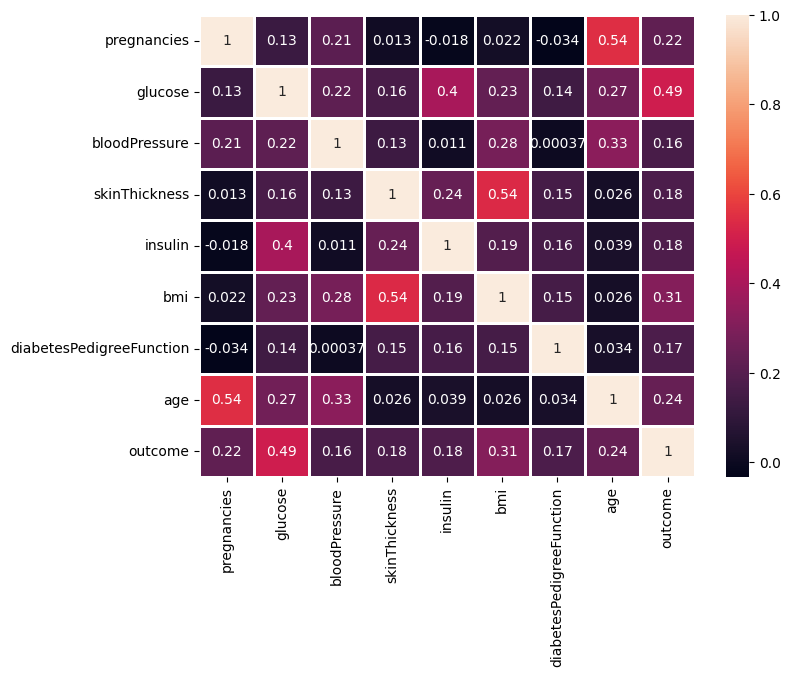

In [6]:
# Heat map correlation
plt.figure(figsize=(8,6))
#heat map code
sns.heatmap(data.corr(), annot=True, linewidths=2)
plt.show()

# # Pairwise the Relationship in the dataset / between attributes

 The pairwise relationship between the attributes in a dataset is important as it can help identify which variables are likely to be related and can also help identify any trends or patterns in the data that could be useful for modeling or analysis purposes.

<Figure size 2000x2000 with 0 Axes>

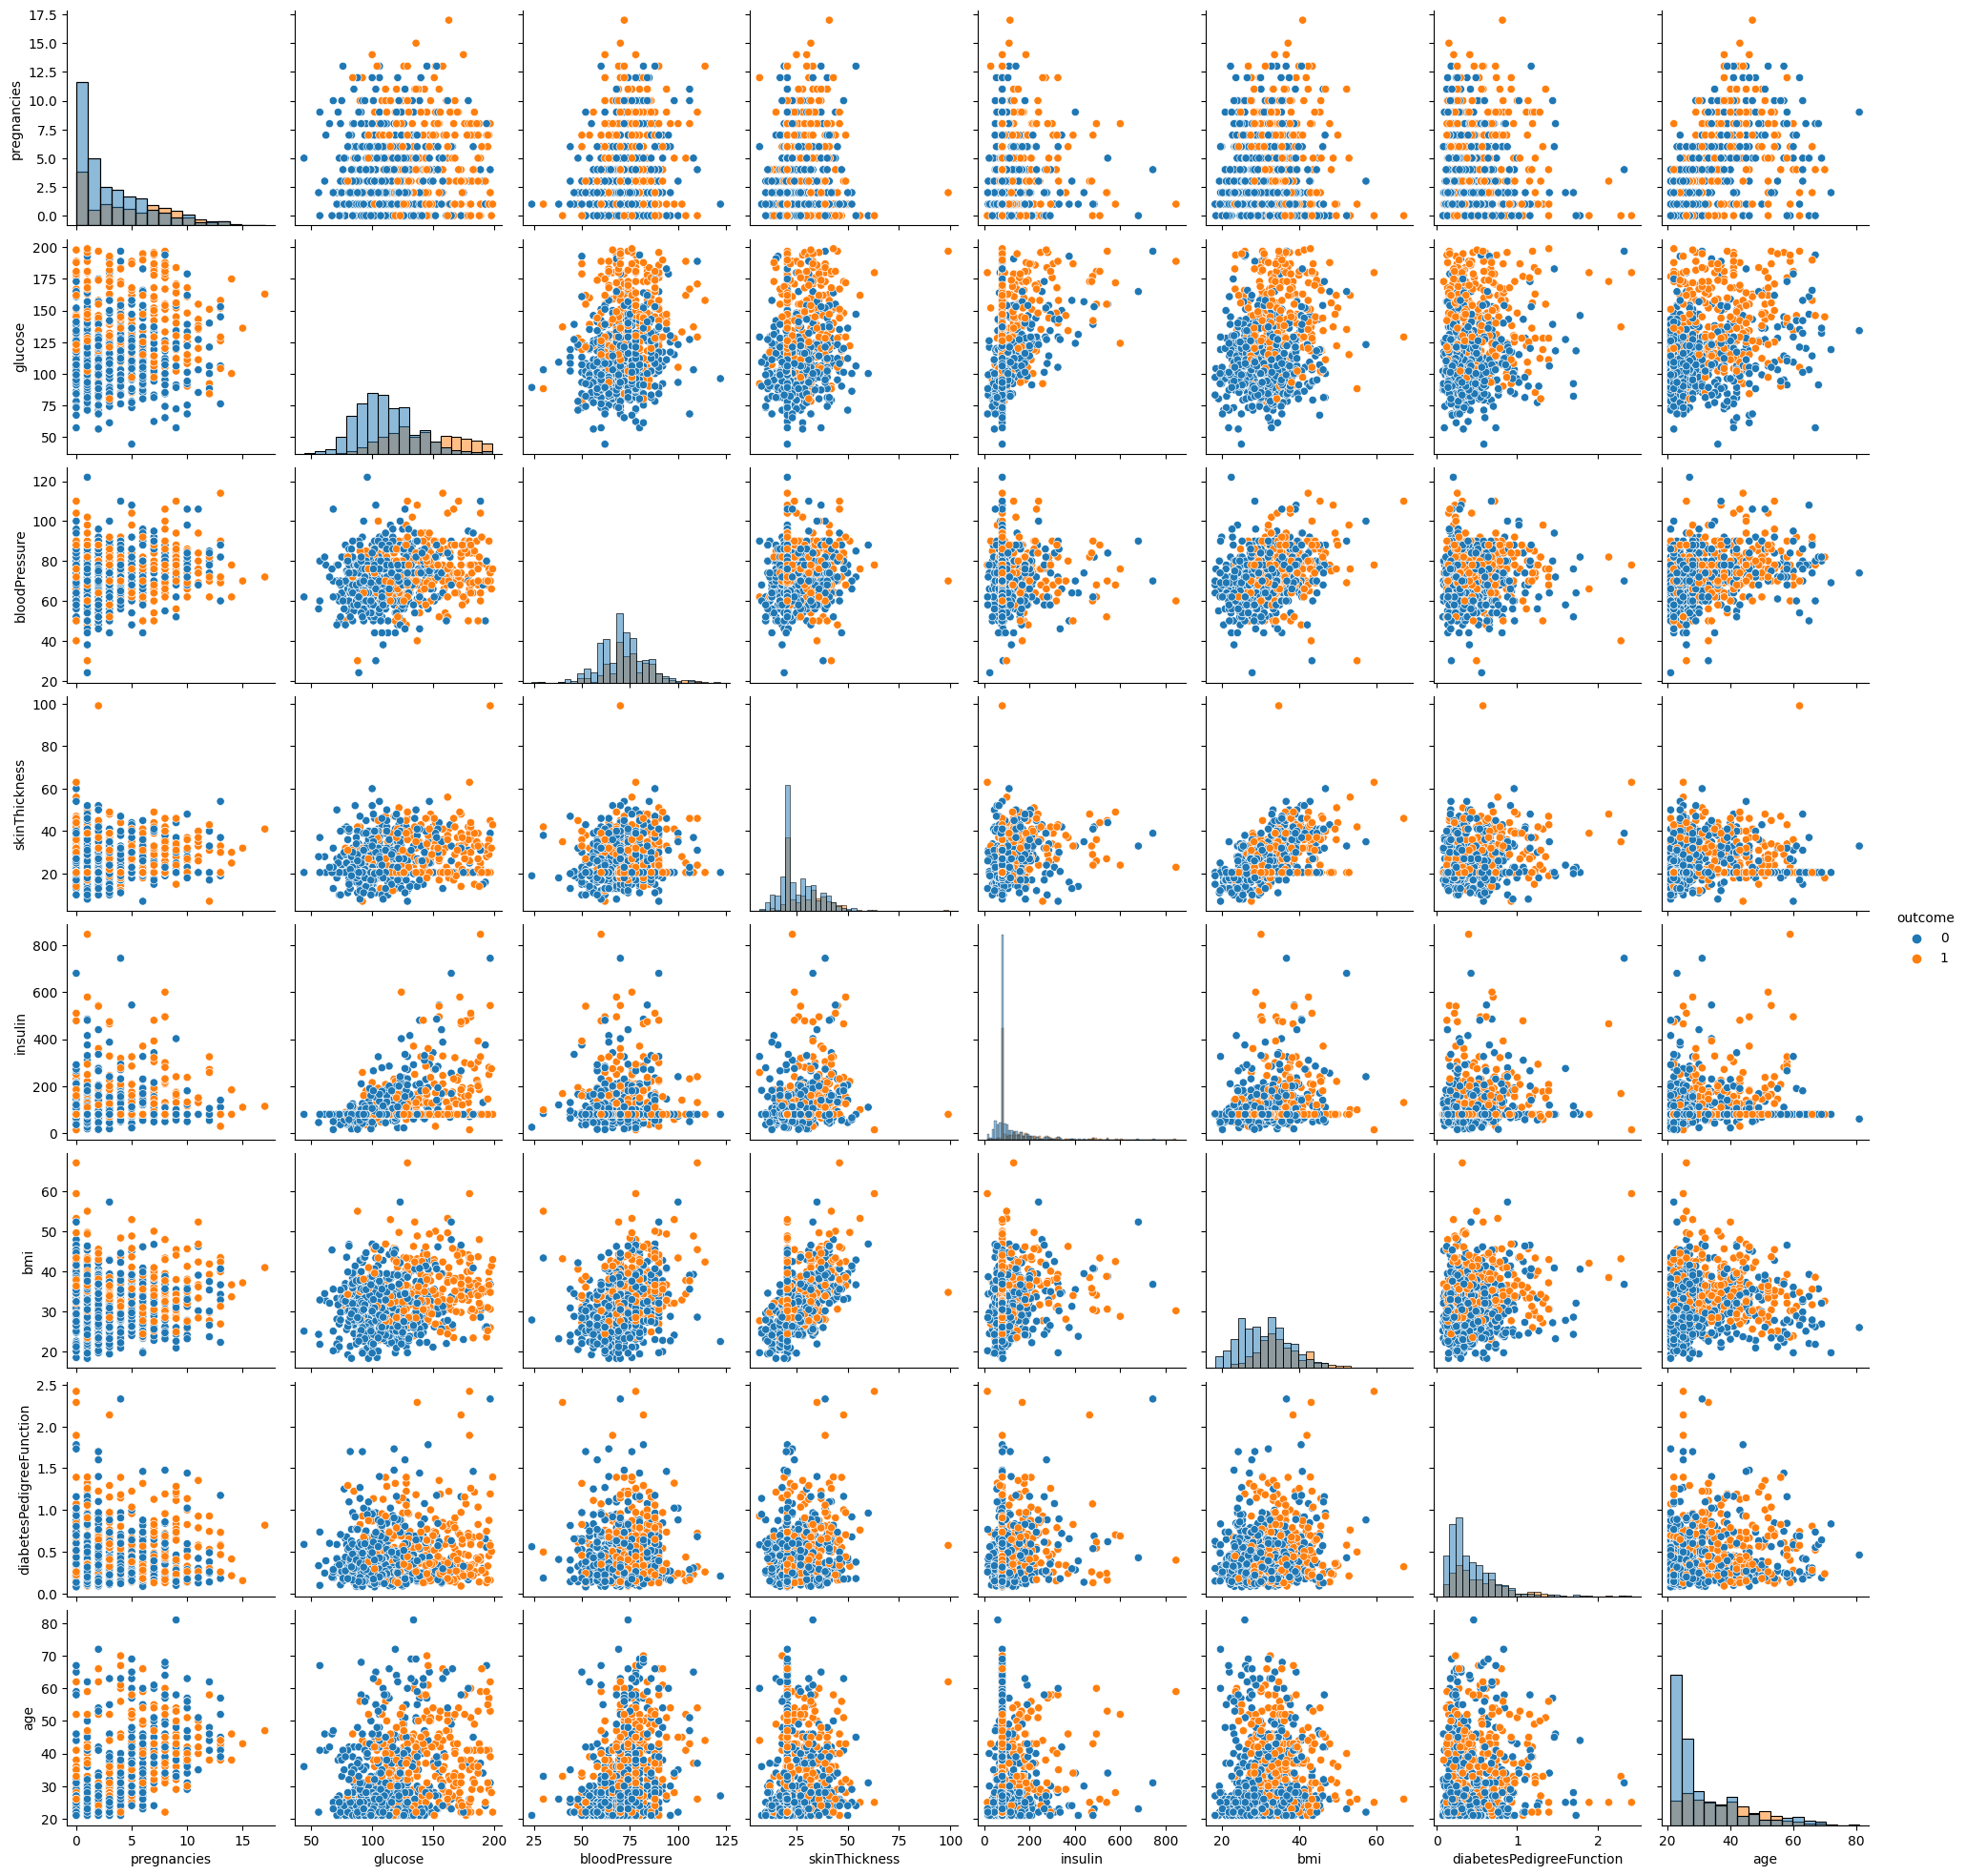

In [7]:
#pairwise relationship in data set (between attributes)
plt.figure(figsize=(20,20))
sns.pairplot(data=data, hue='outcome',diag_kind='hist')
plt.show()

# Explit Train / Test Data

The 'test_size' parameter in the 'train_test_split()' function from the sklearn.model_selection module specifies the proportion of the data that should be allocated to the test set. For example, if 'test_size=0.2', it means that 
* 20% of the data will be allocated to the test set and
* 80% will be allocated to the training set.

In [8]:
#importing train split libarary from sklearn
from sklearn.model_selection import train_test_split

In [9]:
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]

In [10]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.20, random_state = 0)

# Naive Bayes / GaussianNB Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix
import matplotlib.pyplot as plt

In [12]:
naive_model = GaussianNB()

In [13]:
naive_model.fit(x_train ,  y_train.ravel())
y_pred = naive_model.predict(x_test)

In [19]:
    # accuracy score on the training data
    X_train_prediction = naive_model.predict(x_train)
    training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [23]:
# accuracy score on the training data
from sklearn.metrics import accuracy_score
# accuracy score on the training data
X_train_prediction = naive_model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy score of the test data : ', training_data_accuracy)

Accuracy score of the test data :  0.745928338762215


In [21]:
# accuracy score on the test data
X_test_prediction = naive_model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [22]:
# accuracy score on the test data
X_test_prediction = naive_model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
                                    
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7792207792207793


In [16]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.7792207792207793


In [17]:
naive_model.classes_

array([0, 1], dtype=int64)

# Cross Validation

Is used to evaluate the performance of a machine learning model on unseen data. this technique involve dividing the data into a number of folds, training the model on some of the folds, and evaluating it on the remaining folds.

* The model is trained on the training set and evaluated on the test set.
* The model is trained and evaluated once per fold.
* The model is trained on the entire training set in each fold.
* The performance is estimated using a single evaluation metric (e.g., accuracy, AUC)

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(10)
print(cross_val_score(naive_model,X,Y.ravel() , cv = k_fold , n_jobs = 1))

[0.7012987  0.77922078 0.7012987  0.7012987  0.72727273 0.74025974
 0.77922078 0.84415584 0.72368421 0.75      ]


In [19]:
print("accuracy of the Naive Bayes is :",metrics.accuracy_score(y_test,y_pred)*100  ,'%')

accuracy of the Naive Bayes is : 77.92207792207793 %


# Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classifier. It is typically used in binary classification problems, where the goal is to predict whether an observation belongs to one of two classes (positive or negative). The confusion matrix is a 2x2 table that shows the number of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions made by the classifier. The entries in the confusion matrix can be used to calculate various metrics, such as accuracy, precision, recall, and F1 score

In [20]:
confusion_matrix(Y , naive_model.predict(X))

array([[418,  82],
       [108, 160]], dtype=int64)

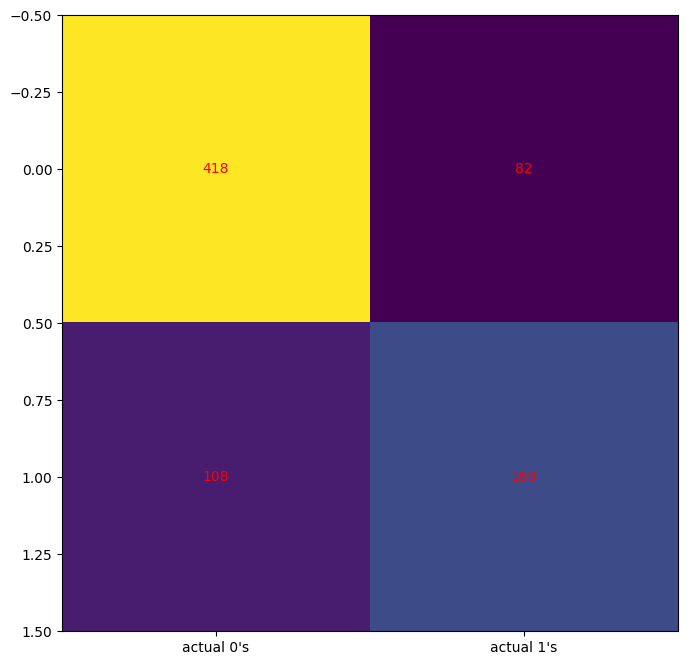

In [21]:

cm = confusion_matrix(Y ,naive_model.predict(X))

fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels =("predicted as 0" , "predicted as 1"))
ax.xaxis.set(ticks = (0,1) , ticklabels =("actual 0's" , "actual 1's"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha = "center" , va = "center" , color = "red")
plt.show()

# Evaluate the model

Accuracy, precision, recall, and F1 score are all evaluation metrics that are commonly used to assess the performance of a machine learning model, especially for classification tasks. These metrics are calculated based on the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the model.

Here is a brief explanation of each metric:

* Accuracy: Accuracy is the proportion of correct predictions made by the model, and is calculated as the number of correct predictions (TP + TN) divided by the total number of predictions (TP + TN + FP + FN). It is often used as a general measure of the model's performance, but it can be misleading if the classes are imbalanced (i.e., one class is much more common than the other).

* Precision: Precision is the proportion of positive predictions that are actually correct, and is calculated as the number of TP predictions divided by the number of TP + FP predictions. It is often used to measure the model's ability to make correct positive predictions, and is useful when the cost of a false positive is high (e.g., in medical diagnosis).

* Recall: Recall is the proportion of actual positive cases that were correctly predicted by the model, and is calculated as the number of TP predictions divided by the number of TP + FN predictions. It is often used to measure the model's ability to identify all the positive cases, and is useful when the cost of a false negative is high (e.g., in fraud detection).

* F1 score: The F1 score is a balance between precision and recall, and is calculated as the harmonic mean of precision and recall. It is defined as:
* F1 = 2 * (precision * recall) / (precision + recall). 
The F1 score is often used as a single metric that combines the strengths of precision and recall, and is useful when both types of errors (false positives and false negatives) are equally important.

It is important to choose an appropriate evaluation metric based on the goals of the machine learning project and the characteristics of the data. For example, accuracy might be suitable for a balanced classification task, while precision or recall might be more appropriate for an imbalanced classification task. In some cases, it may be necessary to use multiple evaluation metrics to get a complete picture of the model's performance.

In [22]:
print(classification_report(Y,naive_model.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       500
           1       0.66      0.60      0.63       268

    accuracy                           0.75       768
   macro avg       0.73      0.72      0.72       768
weighted avg       0.75      0.75      0.75       768



# The accuracy is 75%

# # Test with input data

In [24]:
p1 = naive_model.predict([[6,60,32,43,93,29.7,0.371,60]])
if(p1 == 0):
    print('This person is  not Diabetes')
else:
    print('This person is  Diabetes')
p1

This person is  not Diabetes


C:\Users\Tahir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)